In [1]:
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot
from tqdm import tqdm

In [2]:
from rawFLIR_polarization_data_extraction import *

In [3]:
NUM_IMAGES=1
file_location = "../FLIR_Camera/corals_slowFlow_DeepH_test1_flume_LookAngle_35Deg"
figures_location = "../FLIR_Camera/corals_slowFlow_DeepH_test1_flume_LookAngle_35Deg_FIGURES"
save_location =  "../FLIR_Camera"
dark_files_location = "../FLIR_Camera/dark_imgs"
flat_files_location = "../FLIR_Camera/flat_imgs"

In [4]:
filenames = os.listdir(file_location)

In [5]:
print(filenames[0])

temp-02082021153943-0.tiff


In [6]:
print(len(filenames))

205


In [7]:
filename1 = filenames[0]
print(os.path.exists(os.path.join(file_location, filename1)))

True


Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977312088012695 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


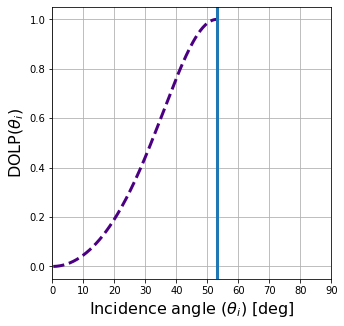

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.610538244247437 seconds
False
AoLP time:  0.038977622985839844 s


In [8]:
im_theta1, im_phi1 = theta_phi(filename1, file_location,
                               material = 'water',
                               flat_field_correct = 1,
                               gaussian_smoothing_sigma = 0,
                               dark_files_location= dark_files_location, flat_files_location= flat_files_location,
                               num_images= NUM_IMAGES, correction_angle=0)

0it [00:00, ?it/s]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


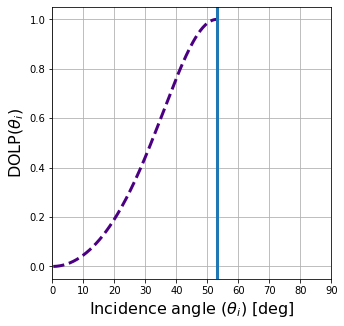

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.56925630569458 seconds
False
AoLP time:  0.03797769546508789 s


NameError: name 'make_axes_locatable' is not defined

<Figure size 432x288 with 0 Axes>

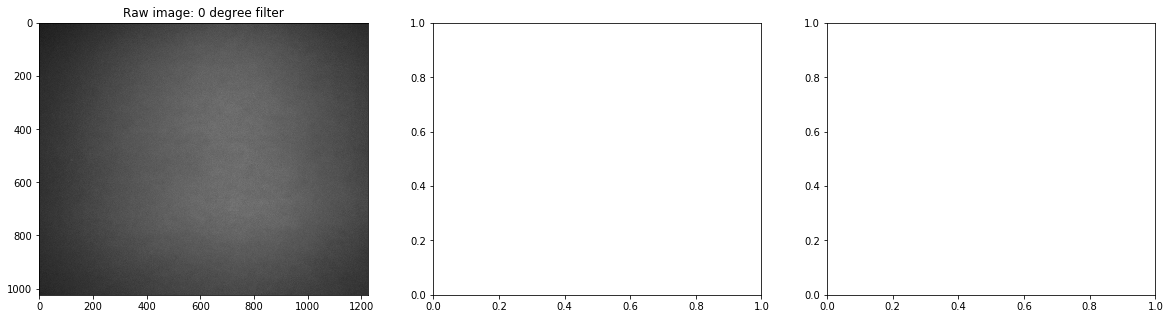

In [9]:
for i,filename2 in tqdm(enumerate(filenames)):
    im_theta2, im_phi2 = theta_phi(filename2, file_location,
                               material = 'water',
                               flat_field_correct = 1,
                               gaussian_smoothing_sigma = 0,
                               dark_files_location= dark_files_location, flat_files_location= flat_files_location,
                               num_images= NUM_IMAGES, correction_angle=0)

    raw_img2 = cv2.imread(os.path.join(file_location, filename2))

    plt.figure()

    #subplot(r,c) provide the no. of rows and columns
    fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize =(20, 5)) 

    ax0.set_title('Raw image: 0 degree filter')
    # Display image, `aspect='auto'` makes it fill the whole `axes` (ax2)
    im0 = ax0.imshow(raw_img2[::2,::2], cmap = plt.cm.gray, aspect='auto')#, vmin = 0, vmax = 255)
    # Create divider for existing axes instance
    divider0 = make_axes_locatable(ax0)
    # Append axes to the right of ax3, with 20% width of ax2
    cax0 = divider0.append_axes("right", size="10%", pad=0.08)
    # Create colorbar in the appended axes
    # Tick locations can be set with the kwarg `ticks`
    # and the format of the ticklabels with kwarg `format`
    cbar0 = plt.colorbar(im0, cax=cax0)

    ax1.set_title('$\\theta - \\theta_{ref}$')
    # Display image, `aspect='auto'` makes it fill the whole `axes` (ax2)
    im1 = ax1.imshow(im_theta2 - im_theta1, vmin = -5, vmax = 5, aspect='auto')
    # Create divider for existing axes instance
    divider1 = make_axes_locatable(ax1)
    # Append axes to the right of ax3, with 20% width of ax2
    cax1 = divider1.append_axes("right", size="10%", pad=0.08)
    # Create colorbar in the appended axes
    # Tick locations can be set with the kwarg `ticks`
    # and the format of the ticklabels with kwarg `format`
    cbar1 = plt.colorbar(im1, cax=cax1)
    # Remove yticks from ax1
    ax1.yaxis.set_visible(False)


    ax2.set_title('$\phi - \phi_{ref}$')
    # Display image, `aspect='auto'` makes it fill the whole `axes` (ax2)
    im2 = ax2.imshow(im_phi2 - im_phi1, cmap = plt.cm.cividis, vmin = -5, vmax = 5, aspect='auto')
    # Create divider for existing axes instance
    divider2 = make_axes_locatable(ax2)
    # Append axes to the right of ax3, with 20% width of ax2
    cax2 = divider2.append_axes("right", size="10%", pad=0.08)
    # Create colorbar in the appended axes
    # Tick locations can be set with the kwarg `ticks`
    # and the format of the ticklabels with kwarg `format`
    cbar2 = plt.colorbar(im2, cax=cax2)
    # Remove yticks from ax2
    ax2.yaxis.set_visible(False)

    plt.savefig(os.path.join(figures_location, filename2[:-5] + '.png'), dpi = 200)

- **Changing AO projection plane for changing illumination orientation:** When light is headon in line with the camera, the angle of plane of polarization is what is expected -- ~ 90 degrees. On the other hand if the light illuminating the surface is oblique, then the angle is different, about 80 degrees for the chosen oblique orientation of the lamp. 
- **Constant AOI with changing orientation:** But the Angle of incidence if found to be near constant 32-35 degrees for oblique and headon illumination. Value does not make a whole lot of sense as the incidence angle is fixed to be 40 degrees. But the constancy idea makes sense. Calibration can be done to check what orientation the computer is seeing